### Modelo_tres. ( Mejorando modelo 0.2 )   OneHotEncoder & Normalizado & Desbalanceado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import numpy as np

import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from pylab import rcParams 

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [7]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [8]:
df['tipo_gestor_etiqueta'].value_counts()

0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64

In [9]:
df['tipo_gestor'].value_counts()

ASESOR FINANCIERO          403840
SIN GESTOR                  43144
SUBDIRECCIÓN DE OFICINA      4390
Name: tipo_gestor, dtype: int64

In [10]:
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp',
         'cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [11]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [12]:
df.head()

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,1,1328106.49,18287.0,14881.0,0.0,1301110.59,14304.39,1,1,1,...,0,1,0,0,1,0,0,0,0,1
1,2,1142234.34,18287.0,14881.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1142234.34,18287.0,28332.0,0.0,1112617.83,0.00,0,0,0,...,0,1,0,2,0,3,0,2,0,1
3,4,1340503.88,41475.0,14204.0,0.0,1076086.83,0.00,1,0,0,...,0,1,0,0,0,3,0,0,0,1
4,5,1758517.70,39000.0,14219.0,0.0,919297.29,109343.49,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [13]:
df.dtypes;

In [14]:
# Convierto variables a object
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [15]:
df.dtypes;

## Normalizamos

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
#con todos los datos numericos
df_datos_numericos =  df.select_dtypes('number')
#df_datos_numericos =  df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

In [19]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [20]:
columnas_datos_numericos = df_datos_numericos.columns

In [21]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [22]:
df_normalizado.head(2)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.258207,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
1,0.223408,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


## Modelo 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
df_normalizado.columns

Index(['saldo_captacion', 'saldo_financiacion', 'saldo_ffii', 'saldo_plp',
       'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int',
       'edad', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [25]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 10832976 (451374, 24)
Datos y = 451374 (451374,)


##  Balanceo 

###  1ª Estrategia: Penalización para compensar Weigth balanced

In [26]:
# puedo elegir solver liblinear sag y saga. los otros no funcionan
modelo3 = LogisticRegression(solver = 'liblinear', class_weight='balanced')

In [27]:
modelo3.fit(X,y)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [28]:
modelo3.predict(X)

array([1., 1., 0., ..., 0., 0., 0.])

In [29]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [30]:
modelo3.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [31]:
modelo3.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [32]:
modelo3.predict_proba(X_test)[:, 1]

array([0.59931889, 0.60864209, 0.70780149, ..., 0.6612345 , 0.85851007,
       0.2815366 ])

[[52290 26200]
 [ 1328 10457]]


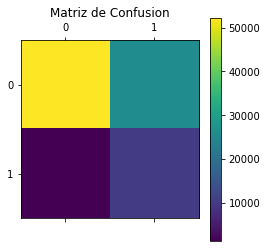

In [33]:
matriz_confusion_modelo3 = confusion_matrix(y_test,modelo3.predict(X_test))
print(matriz_confusion_modelo3)
pl.matshow(confusion_matrix(y_test,modelo3.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [34]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))

accuracy_score =  0.6950650789255054
precision = 0.2852661156122978
recall = 0.88731438268986
f1_score = 0.43173279385657076
roc_auc_score = 0.840723527714158
classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     78490
         1.0       0.29      0.89      0.43     11785

    accuracy                           0.70     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.89      0.70      0.74     90275



### 2ª Estrategia: Subsampling en la clase mayoritaria 
    - Con NearMiss
    - Con Smote
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [35]:
modelo3 = LogisticRegression(solver = 'liblinear')

In [36]:
modelo3.fit(X,y)

LogisticRegression(solver='liblinear')

In [37]:
modelo3.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
# con NearMiss """no mejoramos"""
from imblearn.under_sampling import NearMiss
nr = NearMiss() 

In [39]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)  

In [40]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_miss)))
 

Distribution before resampling Counter({0.0: 314073, 1.0: 47026})
Distribution after resampling Counter({0.0: 47026, 1.0: 47026})


In [41]:
modelo3.fit(X_train_miss, y_train_miss) 

LogisticRegression(solver='liblinear')

In [42]:
modelo3.predict(X_test)

array([1., 1., 1., ..., 0., 1., 0.])

In [43]:
modelo3.predict_proba(X_test)[:, 1]

array([0.63011501, 0.63468601, 0.94985591, ..., 0.35131455, 0.93391261,
       0.49796154])

In [44]:
# RESULTADOS MODELO_03
print('RESULTADOS MODELO_03')
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))


RESULTADOS MODELO_03
accuracy_score =  0.539584602603157
precision = 0.16942341422259719
recall = 0.6475180313958422
f1_score = 0.2685742441840003
roc_auc_score = 0.607437093964879
classification_report
              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66     78490
         1.0       0.17      0.65      0.27     11785

    accuracy                           0.54     90275
   macro avg       0.54      0.59      0.47     90275
weighted avg       0.81      0.54      0.61     90275



In [45]:
# con Smote """ no mejoramos"""
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [46]:
modelo3 = LogisticRegression(solver = 'liblinear')

In [47]:
modelo3.fit(X,y)

LogisticRegression(solver='liblinear')

In [48]:
modelo3.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [50]:
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_smote)))

Distribution before resampling Counter({0.0: 314073, 1.0: 47026})
Distribution labels after resampling Counter({0.0: 314073, 1.0: 314073})


In [51]:
modelo3.fit(X_train_smote, y_train_smote) 

LogisticRegression(solver='liblinear')

In [52]:
modelo3.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [53]:
modelo3.predict_proba(X_test)[:, 1]

array([0.5861754 , 0.6122282 , 0.70572715, ..., 0.66770824, 0.84914958,
       0.28490886])

In [54]:
# RESULTADOS MODELO_03
print('RESULTADOS MODELO_03')
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo3.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo3.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo3.predict(X_test)))


RESULTADOS MODELO_03
accuracy_score =  0.6947106064801994
precision = 0.2849352419904567
recall = 0.886720407297412
f1_score = 0.4312835328105654
roc_auc_score = 0.8409923890652874
classification_report
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     78490
         1.0       0.28      0.89      0.43     11785

    accuracy                           0.69     90275
   macro avg       0.63      0.78      0.61     90275
weighted avg       0.88      0.69      0.74     90275

